<a href="https://colab.research.google.com/github/sameersat96/Clustering_algo/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


## Visualize

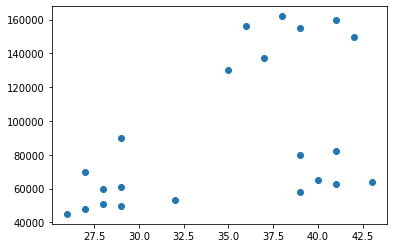

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

## K-means Clustering

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 3)

In [6]:
X = df.drop('Name', axis = 1)       # Takes just X as it is an unsupervised mL model

In [7]:
y_pred = km.fit_predict(X)
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

Adding this array in dataframe

In [8]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


## Visualise

We will create 3 dataframes having 3 clusters

In [9]:
df1 = df[df['Cluster'] ==0]
df2 = df[df['Cluster'] ==1]
df3 = df[df['Cluster'] ==2]

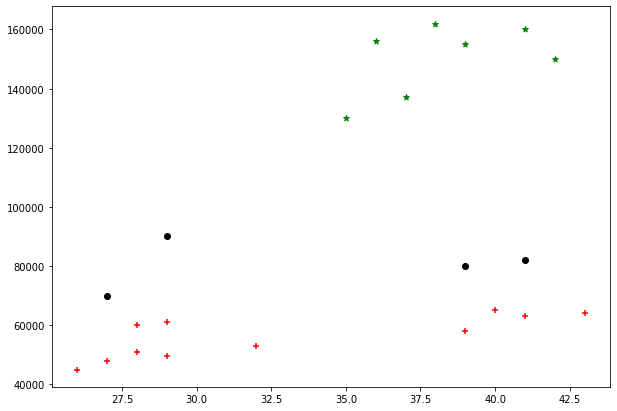

In [10]:
plt.figure(figsize = (10,7))

plt.scatter(df1['Age'], df1['Income($)'], marker='+', color ='red')
plt.scatter(df2['Age'], df2['Income($)'], marker='*', color ='green')
plt.scatter(df3['Age'], df3['Income($)'], color ='black')

* There seems to b an error with bottom 2 clusters
* This can b due to the scale
* y axis has thousands of numbers where as x azis has upto 42.5

## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

### Income

In [12]:
scaler.fit(df[['Income($)']])                                         # Takes 2D array

MinMaxScaler()

In [13]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [14]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


### Age

In [15]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Now repeating the same process from km clustering

## K_Means Clustering

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [17]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
# Adding y_pred to column 'Cluster'

df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


## Visualize

In [19]:
# Creating 3 datasets

df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

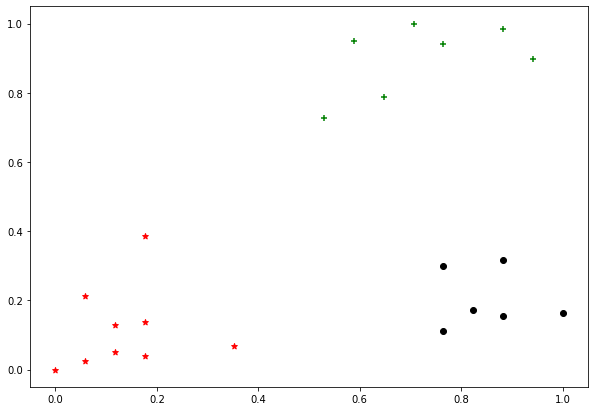

In [20]:
plt.figure(figsize = (10,7))

plt.scatter(df1['Age'], df1['Income($)'], marker = '*', color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], marker = '+', color = 'green')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black')
plt.show()

In [21]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [22]:
# x co-ordinates

c1 = km.cluster_centers_[:,0]
c1

array([0.1372549 , 0.72268908, 0.85294118])

In [23]:
c2 = km.cluster_centers_[:,1]

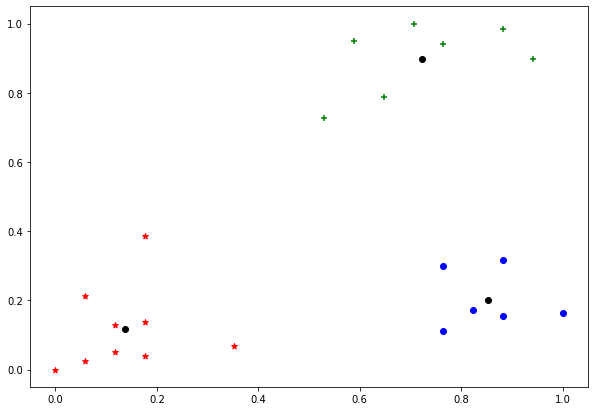

In [24]:
plt.figure(figsize = (10,7))

plt.scatter(c1, c2, color='black')

plt.scatter(df1['Age'], df1['Income($)'], marker = '*', color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], marker = '+', color = 'green')
plt.scatter(df3['Age'], df3['Income($)'], color = 'blue')
plt.show()

## Finding K

We will plot sse for clusters ranging from 1 to 10

In [25]:
sse = []

for k in range(1,10):
  km = KMeans(n_clusters = k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009398,
 0.16869711728567788,
 0.13706529523670868,
 0.10188787724979426]

In [26]:
k_range = range(1,10)
k_range

range(1, 10)

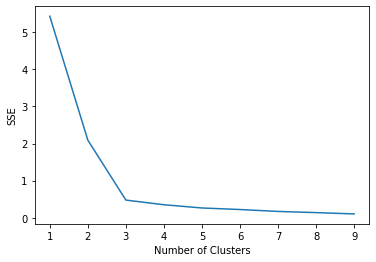

In [27]:
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_range, sse)

We can easily notice that the elbow point is at 3

Which means that the right number of clusters that should be formed are 3